# Forest Cover Type Prediction
In this notebook, we will be predicting the cover type of a forest based on the given dataset. You can find the competition and the dataset [here](https://www.kaggle.com/competitions/forest-cover-type-prediction).

<div align="center">
<img src="https://storage.googleapis.com/kaggle-datasets-images/4215545/7271876/e97e3508f549c939f93778433776a2d3/dataset-cover.jpg?t=2023-12-24-11-45-39" />
</div>

## 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings

### Configurations

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Loading Data

In [4]:
df = pd.read_csv('train.csv', index_col='Id')

In [5]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   
3        2804     139      9                               268   
4        2785     155     18                               242   
5        2595      45      2                               153   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   
3                               65                             3180   
4                              118                             3090   
5                               -1                              391   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   
3             234             238            135   
4             238             238            122   
5             220             234            150   

    Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
Id                                                                           
1                                 6279                 1                 0   
2                                 6225                 1                 0   
3                                 6121                 1                 0   
4                                 6211                 1                 0   
5                                 6172                 1                 0   

    Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
Id                                                                           
1                  0                 0           0           0           0   
2                  0                 0           0           0           0   
3                  0                 0           0           0           0   
4                  0                 0           0           0           0   
5                  0                 0           0           0           0   

    Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
Id                                                                           
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   
5            0           0           0           0           0           0   

    Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            1            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type20  Soil_Type21  Soil_Type22

In [6]:
df.shape

(15120, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wildernes

In [8]:
df.isnull().sum().sort_values(ascending=False)

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
df.duplicated().sum()

np.int64(0)

## 3. Exploratory Data Analysis

In [10]:
df.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type7    Soil_Type8    Soil_Type9   Soil_Type10   Soil_Type11  \
count     15120.0  15120.00000

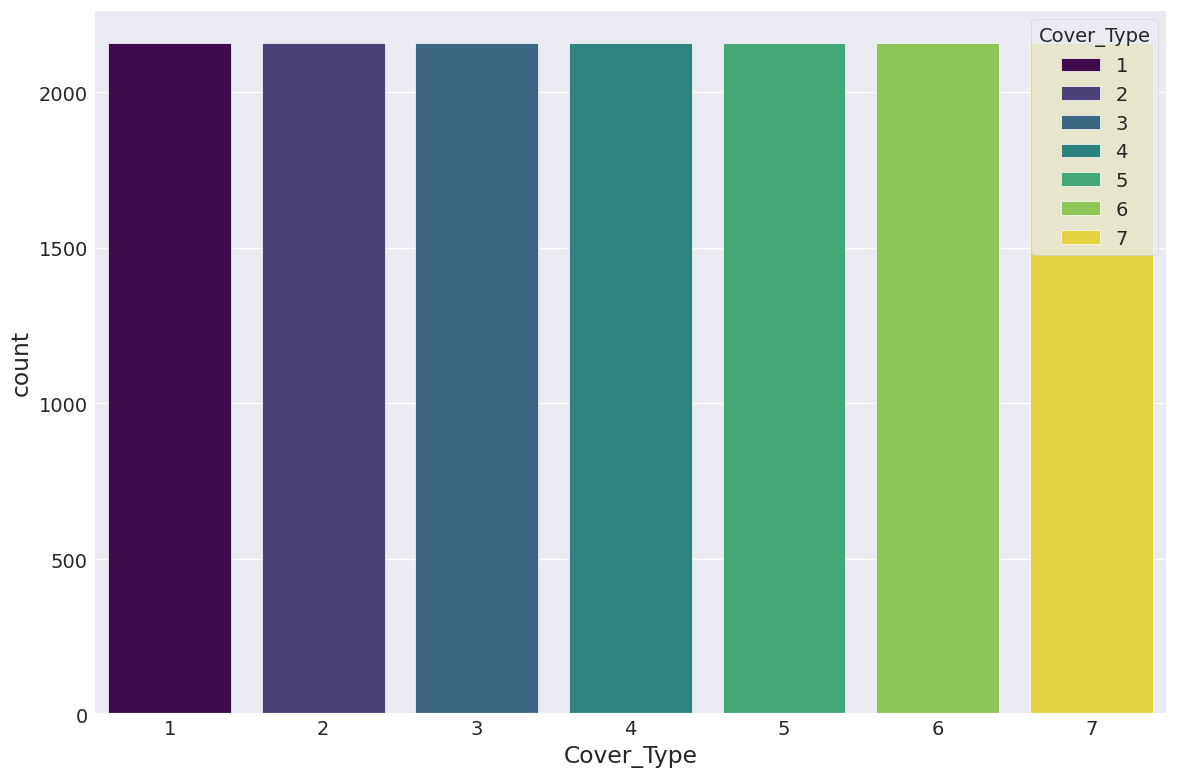

In [11]:
sns.countplot(x=df['Cover_Type'], hue=df['Cover_Type'], palette='viridis')
plt.tight_layout()

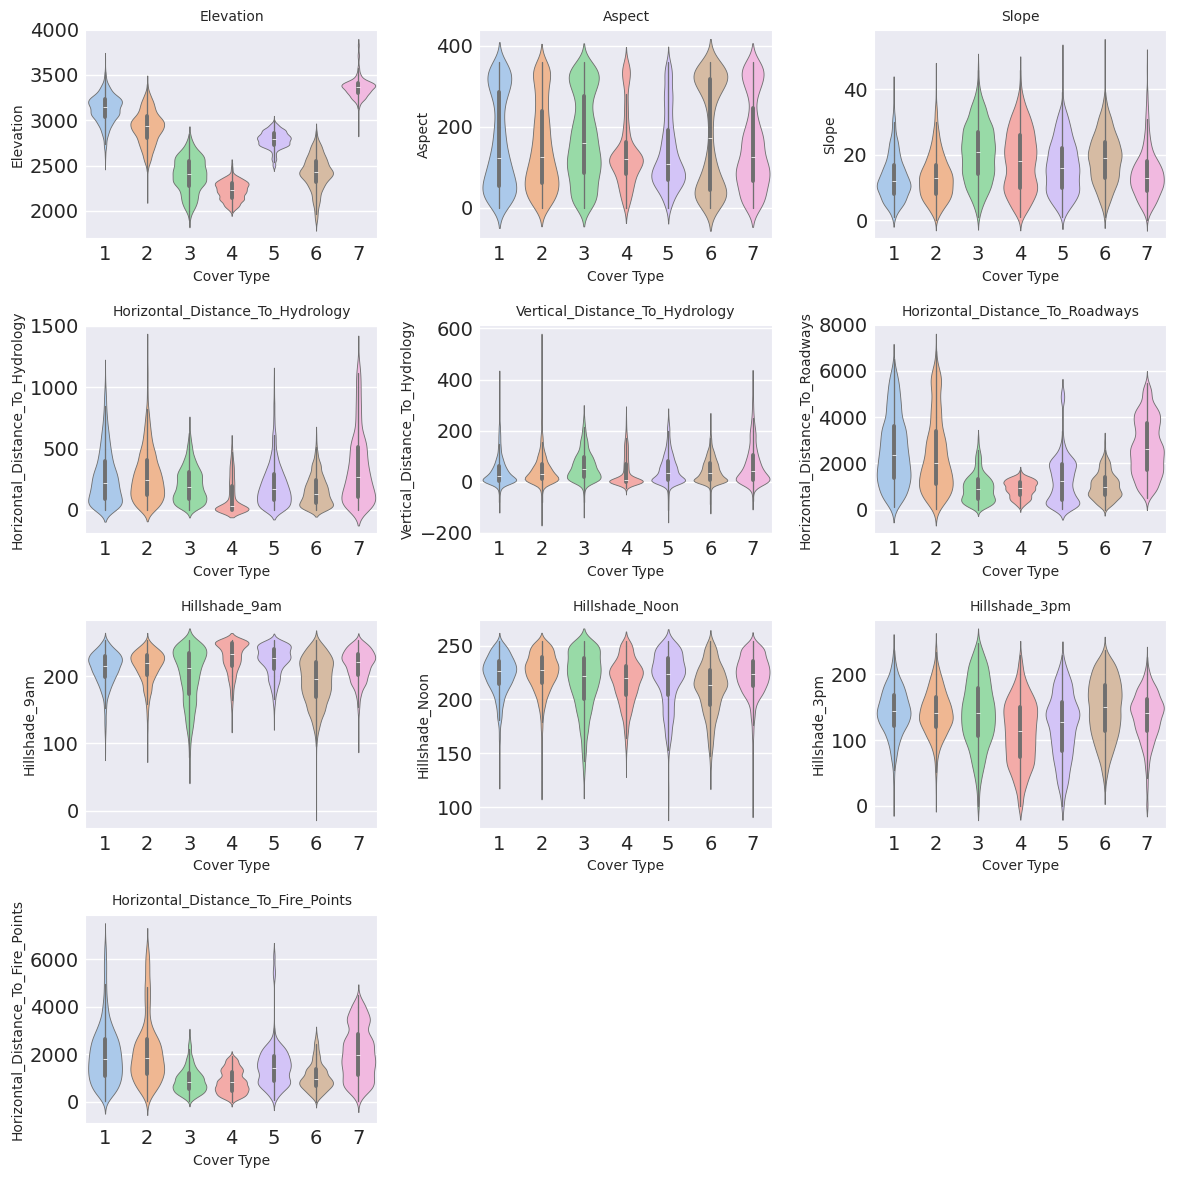

In [12]:
plt.figure(figsize=(12, 12))
for i, c in enumerate(df.columns[:10]):
    plt.subplot(4, 3, i+1)
    sns.violinplot(x=df['Cover_Type'], y=df[c], palette='pastel')
    plt.title(c, fontsize=10)
    plt.xlabel('Cover Type', fontsize=10)
    plt.ylabel(c, fontsize=10)
    
plt.tight_layout()

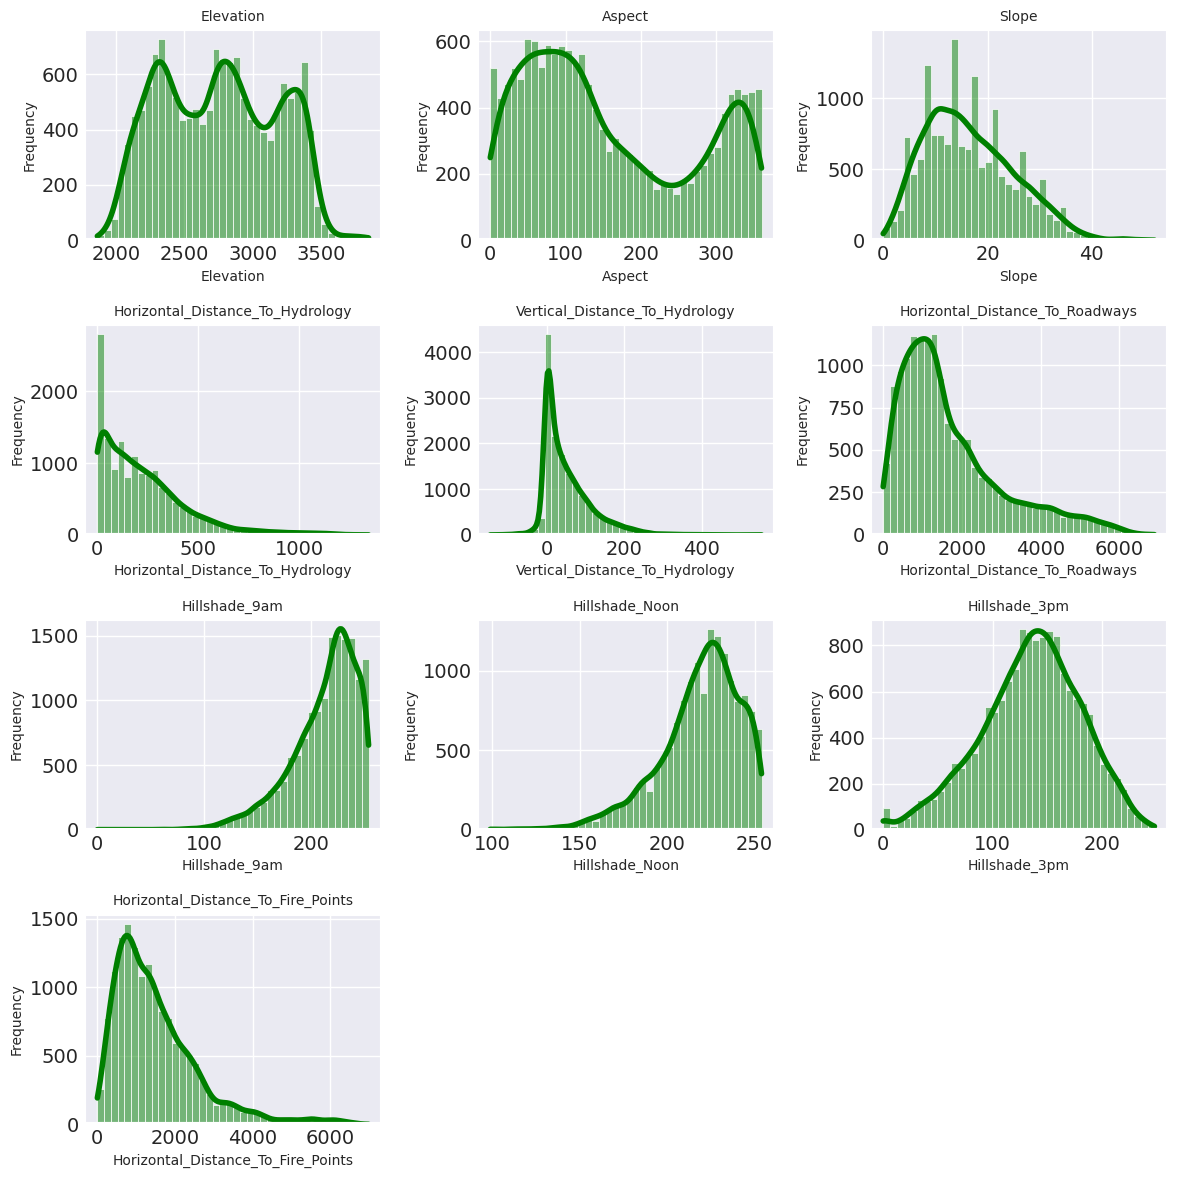

In [13]:
plt.figure(figsize=(12, 12))
for i, c in enumerate(df.columns[:10]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[c], bins=40, kde=True, color='g')
    plt.title(c, fontsize=10)
    plt.xlabel(c, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
plt.tight_layout()

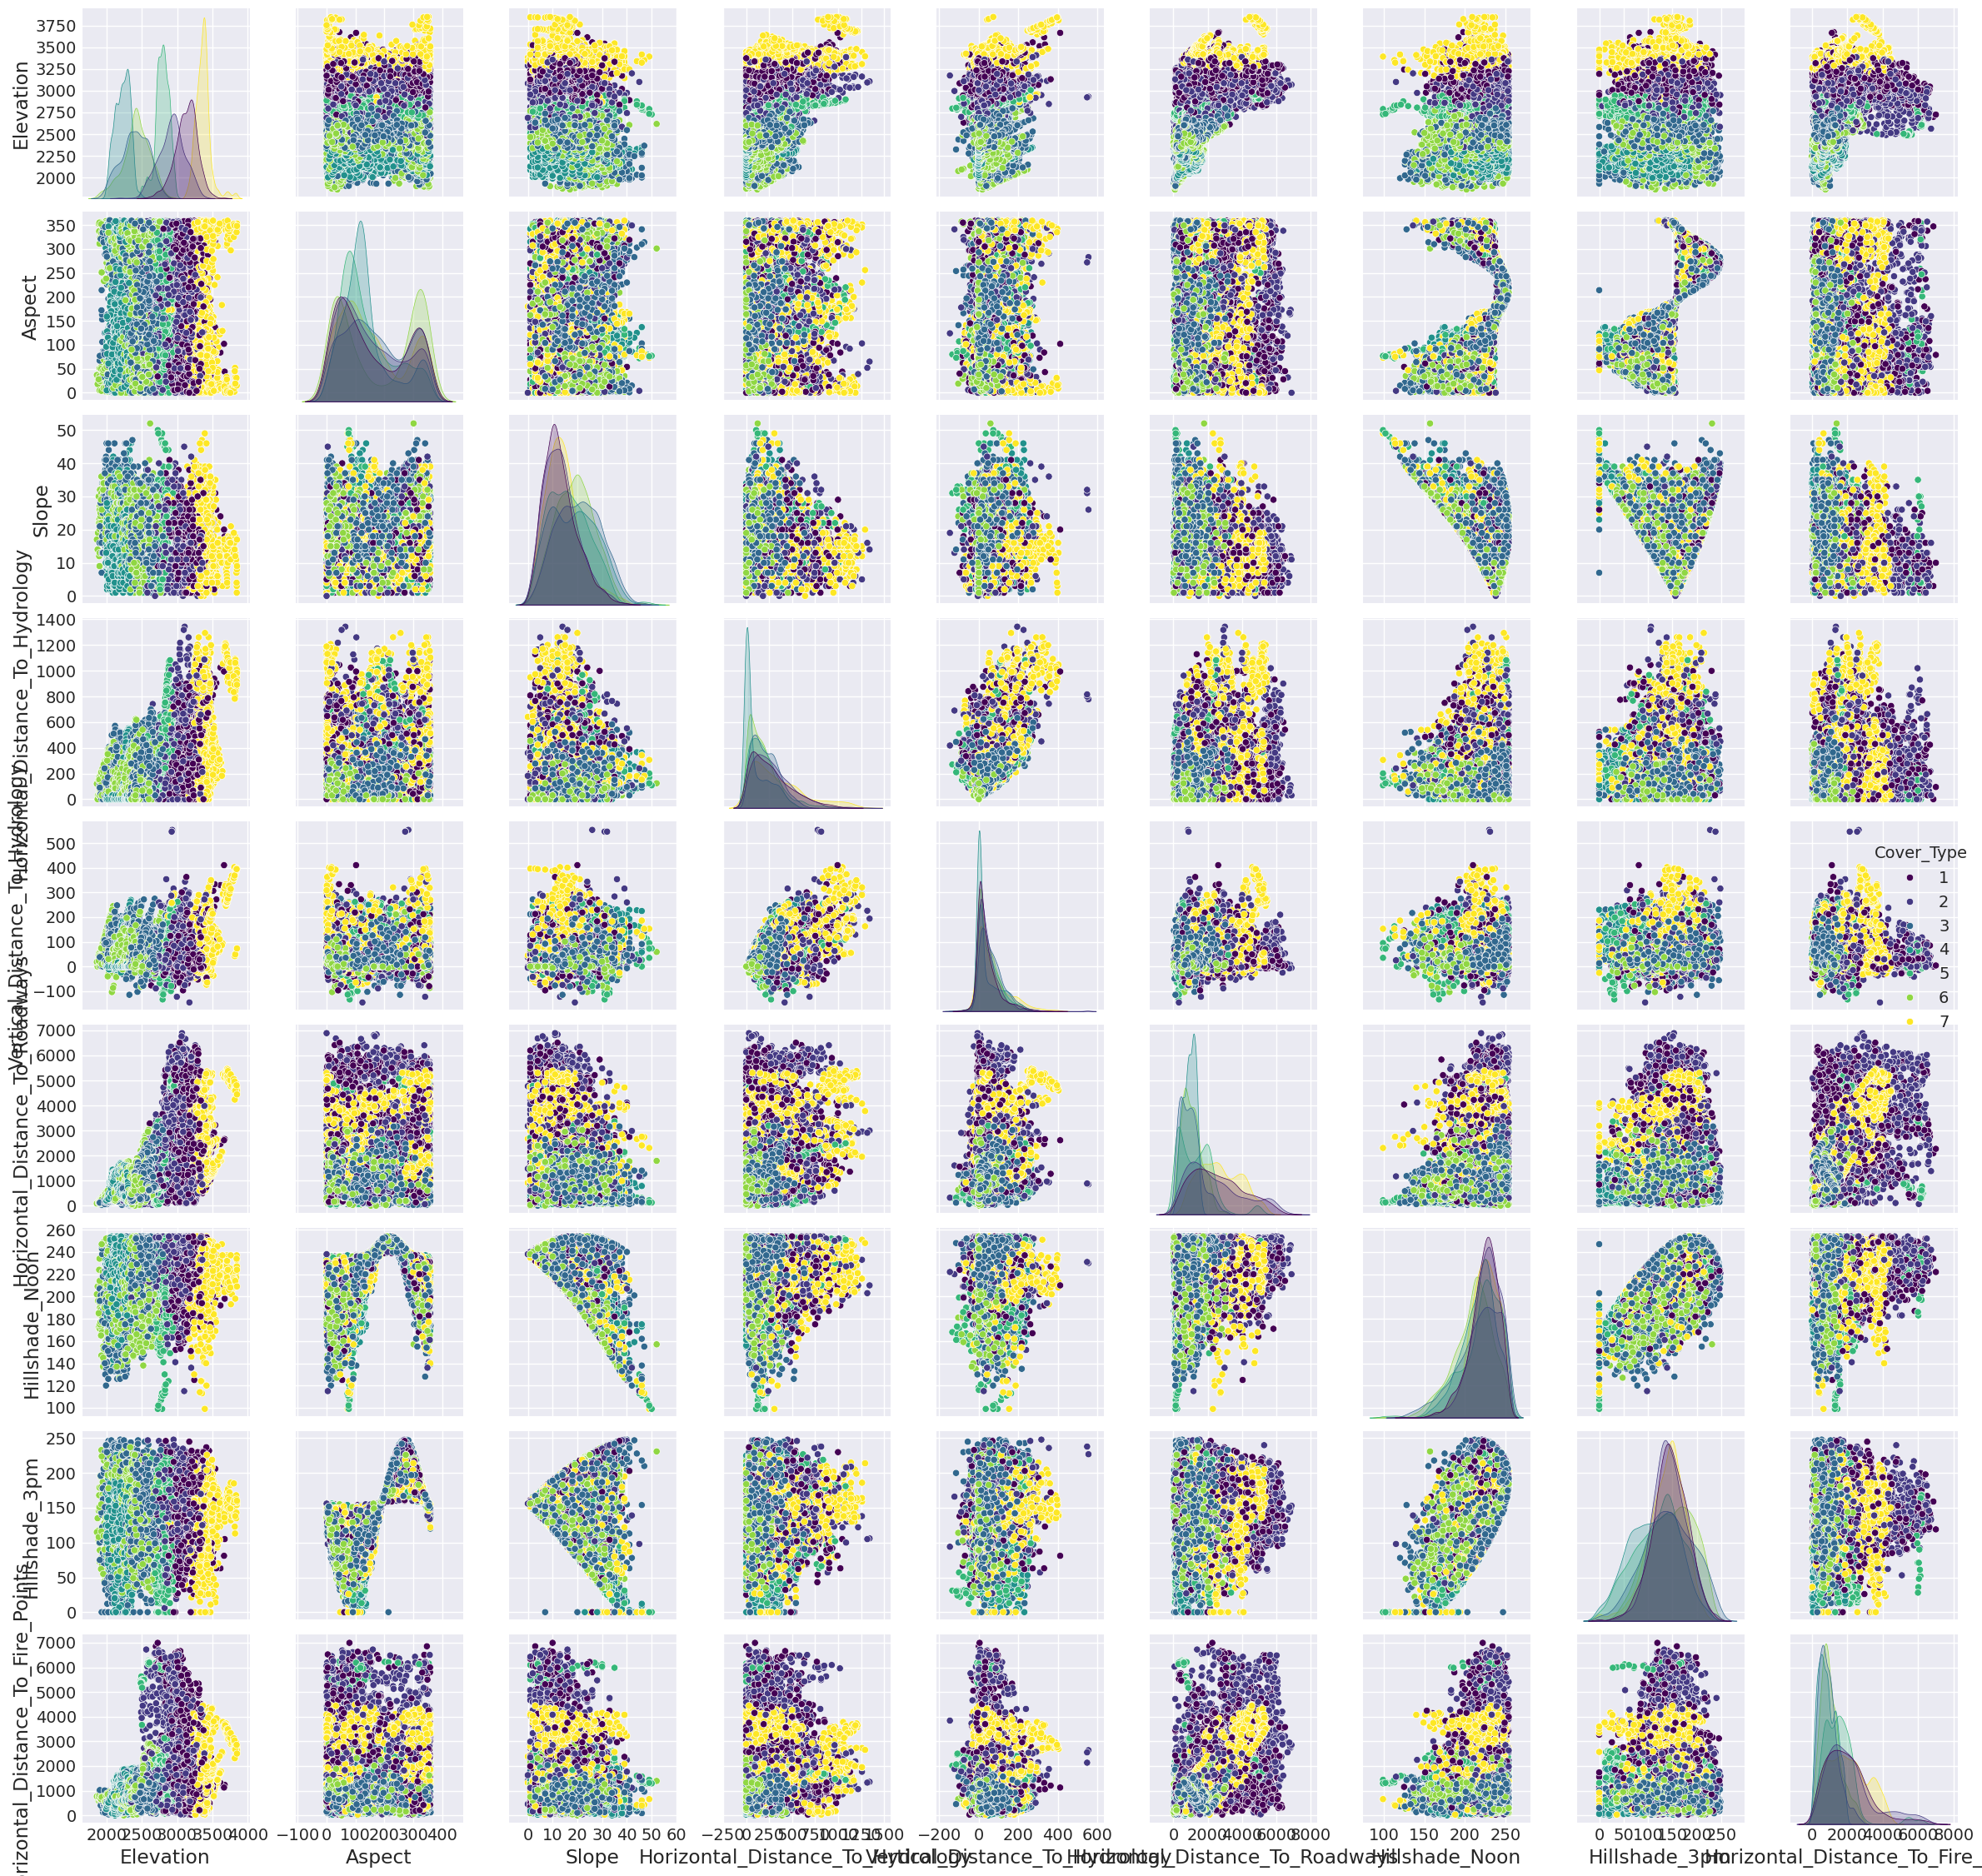

In [14]:
sns.pairplot(df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']], hue='Cover_Type', palette='viridis')
sns.set_theme(font_scale=0.5)
plt.tight_layout()

<Axes: >

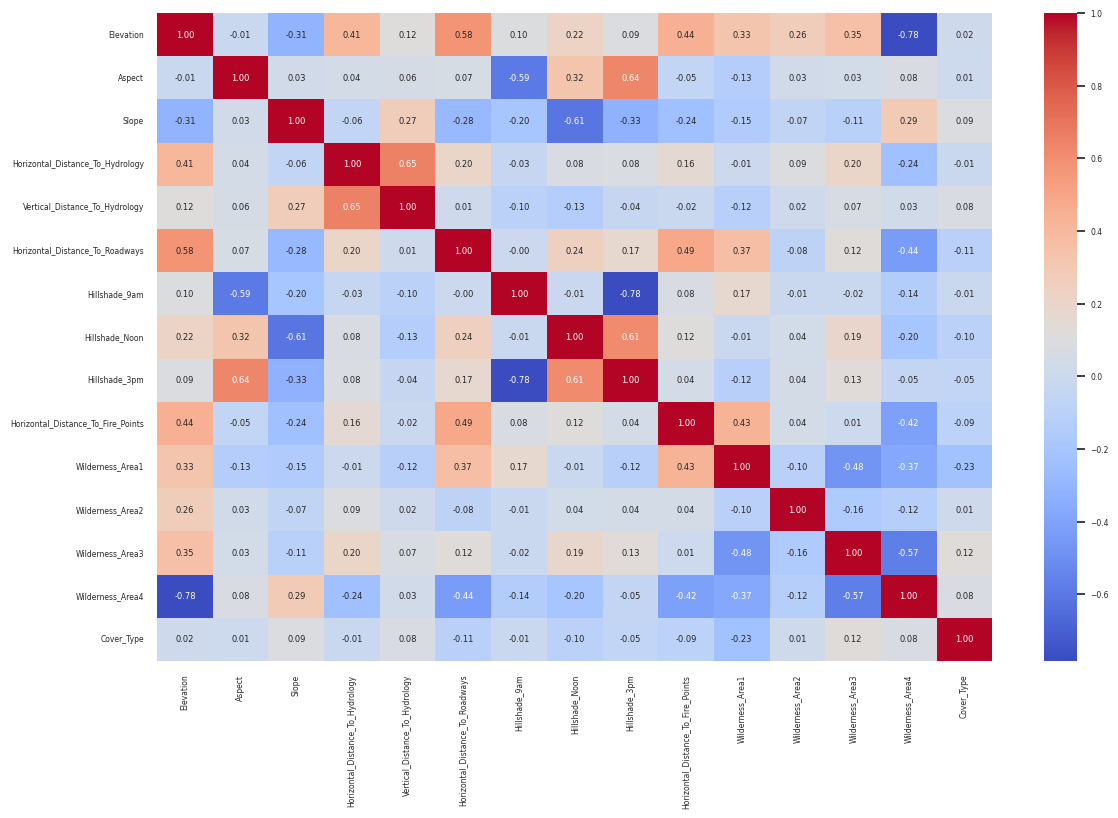

In [15]:
sns.heatmap(
    df.drop(columns=df.filter(like='Soil')).corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm'
)

In [16]:
abs(df.corr()['Cover_Type']).sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Wilderness_Area1                      0.230117
Soil_Type29                           0.218564
Soil_Type40                           0.205851
Soil_Type22                           0.195993
Soil_Type23                           0.158762
Soil_Type32                           0.132312
Soil_Type12                           0.129985
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Horizontal_Distance_To_Roadways       0.105662
Soil_Type24                           0.100797
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Soil_Type31                           0.079882
Soil_Type33                           0.078955
Wilderness_Area4                      0.075774
Vertical_Dist

## 4. Data Preprocessing

In [17]:
x = df.drop(columns=['Cover_Type'])
y = df[['Cover_Type']]

In [18]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## 5. Model Training

In [20]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(),
    'LightGBMClassifier': lgb.LGBMClassifier(verbose=-1)
}

def evaluate(x_train, y_train, x_test, y_test):
    results = []

    for i, (model_name, model) in enumerate(tqdm(models.items())):
        if 'random_state' in model.get_params():
            model.set_params(random_state=42)

        print(f'Training {model_name}...')
        y_pred = model.fit(x_train, y_train).predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        plt.subplot(3, 5, i+1)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name, fontsize=12)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
    plt.suptitle('Confusion Matrices of All Models')
    plt.tight_layout()
    
    report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

  0%|          | 0/11 [00:00<?, ?it/s]

Training GaussianNB...
Training MultinomialNB...
Training BernoulliNB...
Training LogisticRegression...
Training ExtraTreesClassifier...
Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training GradientBoostingClassifier...
Training KNeighborsClassifier...
Training SVC...
Training LightGBMClassifier...


Model  Accuracy  Precision    Recall  F1 Score
0       RandomForestClassifier  0.872685   0.870021  0.872195  0.870231
1           LightGBMClassifier  0.868056   0.864775  0.867505  0.865474
2         ExtraTreesClassifier  0.865410   0.862698  0.864948  0.862980
3   GradientBoostingClassifier  0.802579   0.798162  0.801805  0.797621
4         KNeighborsClassifier  0.794643   0.789164  0.793843  0.789707
5       DecisionTreeClassifier  0.788360   0.785540  0.787786  0.786135
6                          SVC  0.717593   0.714488  0.716205  0.711930
7           LogisticRegression  0.679894   0.674773  0.678487  0.674917
8                  BernoulliNB  0.605159   0.604197  0.602296  0.593371
9                MultinomialNB  0.602183   0.598498  0.599789  0.595997
10                  GaussianNB  0.471561   0.513502  0.467944  0.382010

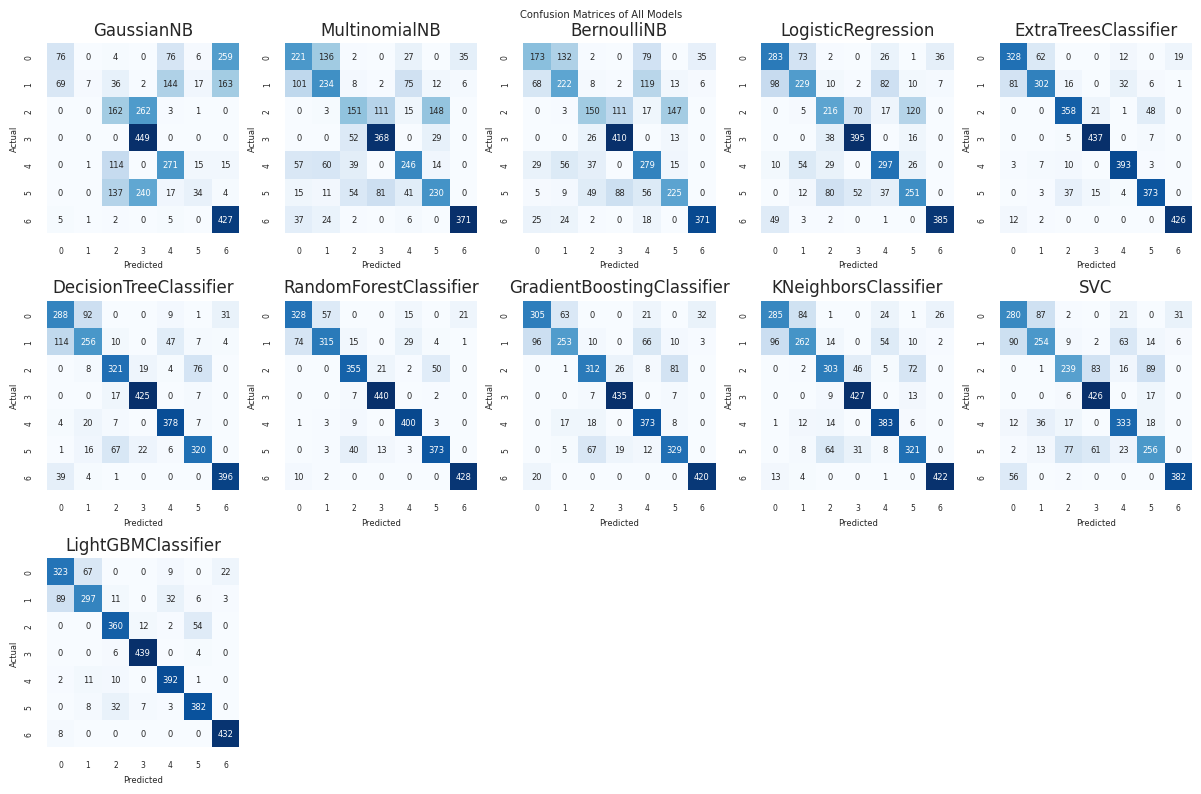

In [21]:
evaluate(x_train, y_train, x_test, y_test)

## 6. Build Pipeline with the best model, Save the model, Make Submission

In [22]:
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), x.columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2'...
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [23]:
y_pred = pipeline.predict(x)

In [24]:
confusion_matrix(y, y_pred)

array([[2160,    0,    0,    0,    0,    0,    0],
       [   0, 2160,    0,    0,    0,    0,    0],
       [   0,    0, 2160,    0,    0,    0,    0],
       [   0,    0,    0, 2160,    0,    0,    0],
       [   0,    0,    0,    0, 2160,    0,    0],
       [   0,    0,    0,    0,    0, 2160,    0],
       [   0,    0,    0,    0,    0,    0, 2160]])

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2160
           2       1.00      1.00      1.00      2160
           3       1.00      1.00      1.00      2160
           4       1.00      1.00      1.00      2160
           5       1.00      1.00      1.00      2160
           6       1.00      1.00      1.00      2160
           7       1.00      1.00      1.00      2160

    accuracy                           1.00     15120
   macro avg       1.00      1.00      1.00     15120
weighted avg       1.00      1.00      1.00     15120



In [26]:
joblib.dump(pipeline, 'forest_cover_type_prediction.pkl')

['forest_cover_type_prediction.pkl']

In [27]:
test_df = pd.read_csv('test.csv', index_col='Id')
predictions = pipeline.predict(test_df)
submission = pd.DataFrame({
    'Id': test_df.index,
    'Cover_Type': predictions
})
submission.head()

Id  Cover_Type
0  15121           2
1  15122           1
2  15123           2
3  15124           2
4  15125           2

In [28]:
submission.to_csv('submission.csv', index=False)

## 7. Conclusion
This project successfully built a machine learning pipeline to predict forest cover types using various environmental features. Through comprehensive EDA, we identified key patterns in the data and evaluated multiple classification models. The `RandomForestClassifier` emerged as the best performer, achieving high accuracy on the test set. The final pipeline includes proper preprocessing with `MinMaxScaler` and is ready for deployment, with the trained model saved for future use.

In [29]:
x.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [30]:
x.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type7    Soil_Type8    Soil_Type9   Soil_Type10   Soil_Type11  \
count     15120.0  15120.00000